In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect
from sqlalchemy import or_

In [2]:
engine = create_engine('sqlite:///Resources/hawaii.db')

In [3]:
inspector = inspect(engine)
inspector.get_table_names()

['measurements', 'stations']

In [4]:
print('TABLE: measurements\n' + '-'*10)
measurement_columns = inspector.get_columns('measurements')
for col in measurement_columns:
    print(col['name'], col['type'])

print('\nTABLE: stations\n' + '-'*10)
station_columns = inspector.get_columns('stations')
for col in station_columns:
    print(col['name'], col['type'])

TABLE: measurements
----------
id INTEGER
station TEXT
date VARCHAR
prcp FLOAT
tobs INTEGER

TABLE: stations
----------
id INTEGER
station VARCHAR
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [5]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Station = Base.classes.stations
Measurement = Base.classes.measurements

In [6]:
session = Session(engine)

In [7]:
precipitation = session.query(Measurement.date, Measurement.prcp).filter(or_(
    Measurement.date.like('2017%'), 
    Measurement.date.like('2016%')))

In [8]:
df_precip = pd.DataFrame(precipitation[:], columns=['date','prcp'])
df_precip['date'] = pd.to_datetime(df_precip['date'])

df_precip = df_precip[(df_precip['date'] >= '2016-08-01') & (df_precip['date'] <= '2017-08-23')].reset_index(drop=True)
df_precip.set_index('date', inplace=True)
df_precip.head()

,prcp
date,
2016-08-01,0.08
2016-08-02,0.05
2016-08-03,0.00
2016-08-04,0.04
2016-08-05,0.01


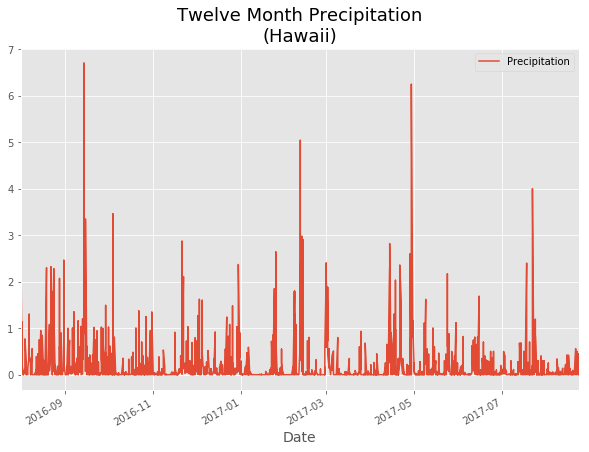

In [9]:
plt.style.use('ggplot')


ax = df_precip.plot(use_index=True, figsize=(10,7), grid=True)
ax.set_title('Twelve Month Precipitation\n(Hawaii)', size=18)
ax.set_xlabel('Date', size=14)
ax.legend(labels=['Precipitation'])
plt.show()

In [10]:
df_precip_stats = df_precip['prcp'].describe()[['count','mean','min','max']]
print(f'Twelve Month Precipitation Summary\n{df_precip_stats}')

Twelve Month Precipitation Summary
count    2148.000000
mean        0.182896
min         0.000000
max         6.700000
Name: prcp, dtype: float64
